# Ridge 회귀 모형

```
Ridge 회귀모형에서는 가중치 제곱합을 최소하는 것을 추가적인 제약 조건으로 한다 
```

$$ w = arg min(\sum^{N}_{i=1}e^{2}_{i} + \lambda \sum^{M}_{j=1}w^{2}_{j} )$$


$\lambda$는 기존 잔차 제곱합과 추가적 제약 조건이 비중을 조절하기 위한 Hyper Parameter<br>
$\lambda$가 커지면 정규화 정도가 커지고 가중치 값들이 작아짐.<br>
$\lambda$가 작아지면 정규화 정도가 작아짐<br>
$\lambda$가 0이면 선형 회귀 모형<br>


In [10]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

In [11]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)


In [12]:
X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

/home/nuri/.conda/envs/tf113/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
model = sm.OLS.from_formula(
    "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723116
I(x ** 4)   -18340.939669
I(x ** 5)    49326.072559
I(x ** 6)   -78884.743096
I(x ** 7)    74538.645174
I(x ** 8)   -38453.132202
I(x ** 9)     8350.254988
dtype: float64

In [14]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()

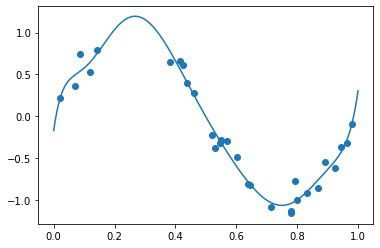

In [15]:
plot_statsmodels(result1)

#  모수 L1_Wr가 0 이면 순수 Ridge 모형

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


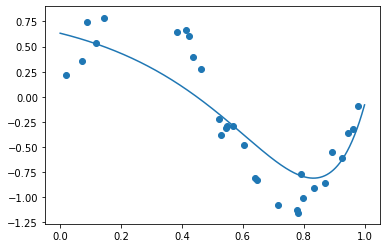

In [16]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

# Scikit 예제

In [17]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386452e+04
 -3.84531322e+04  8.35025499e+03]


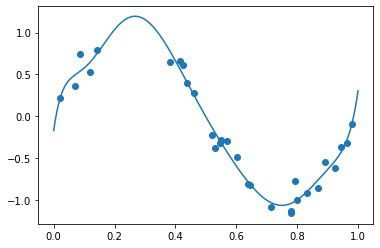

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


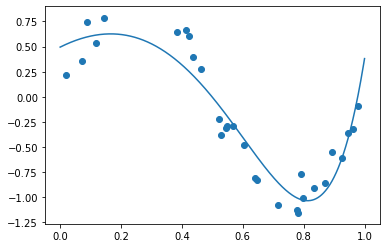

In [19]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[pipeline 예제](https://code-examples.net/ko/q/26d27ed)

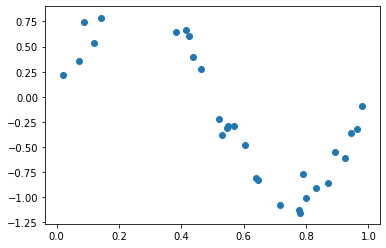

In [22]:
plt.scatter(X,y)
plt.show()

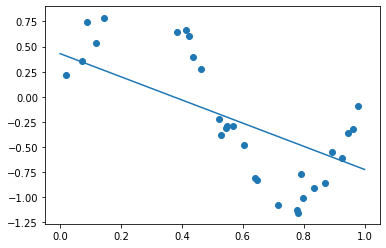

In [38]:
r_model1 = Ridge().fit(X,y)
plot_sklearn(r_model1)

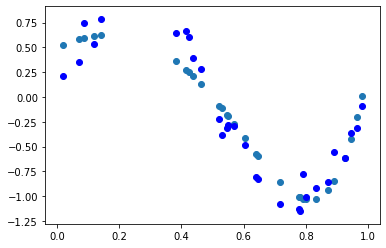

In [51]:
new_x = poly.fit(X).transform(X)

r_model2= Ridge(alpha=0.01).fit(new_x, y)

y_hat = r_model2.predict(new_x)
plt.scatter(X, y_hat)
plt.scatter(X, y, color='b')
plt.show()
# r_model2 = Ridge(alpha=0.01).fit(new_x,y)
# plot_sklearn(r_model2)
# print(r_model2.coef_)

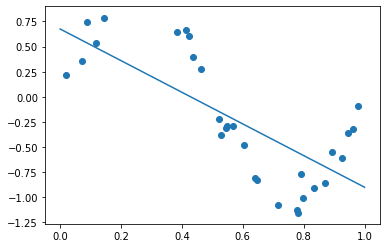

In [33]:
plot_sklearn(Ridge(alpha=0.1).fit(X,y))

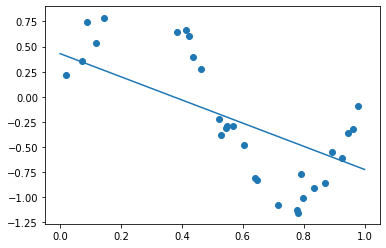

In [31]:
plot_sklearn(Ridge(1).fit(X,y))